In [2]:
"""K Means Clustering Implementation
This module provides a simple implementation of the K Means clustering algorithm.
Here K Means Clustering is used to cluster Universities into two distinct groups."""

'K Means Clustering Implementation\nThis module provides a simple implementation of the K Means clustering algorithm.\nHere K Means Clustering is used to cluster Universities into two distinct groups.'

In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [5]:
# Read the dataset
df = pd.read_csv('College_Data', index_col=0)

In [6]:
df.head()   

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

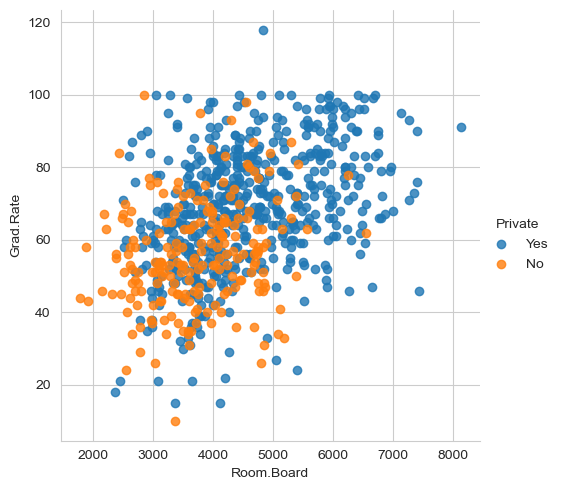

In [14]:
# Exploratory Data Analysis
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private',fit_reg=False)
plt.show()

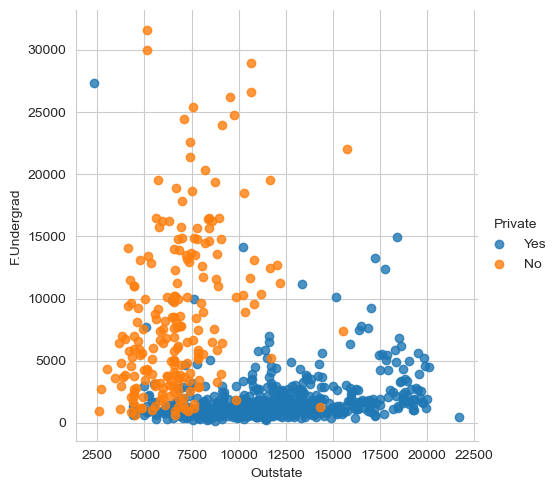

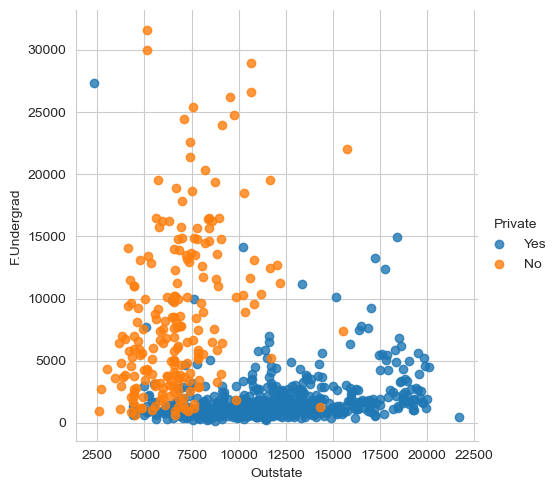

In [16]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=df, hue='Private',fit_reg=False)
plt.show()

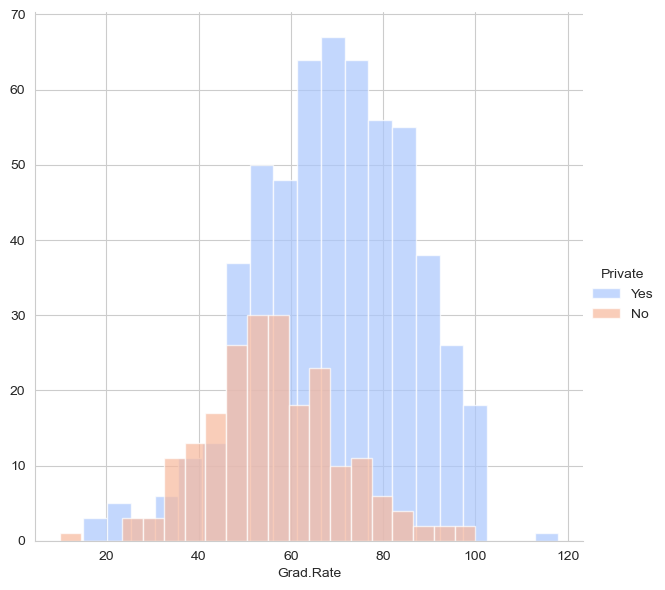

In [17]:
Facid = sns.FacetGrid(df, hue="Private", palette="coolwarm", height=6)
Facid.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
Facid.add_legend()
plt.show()

In [18]:
# There is an entry where Grad.Rate > 100, which is not possible. Let's fix it.
df[df['Grad.Rate'] > 100]


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [19]:
df['Grad.Rate']['Cazenovia College'] = 100

C:\Users\asus\AppData\Local\Temp\ipykernel_33984\2087630962.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Grad.Rate']['Cazenovia College'] = 100
C:\Users\asus\AppData\Local\Temp\ipykernel_33984\2087630962.py:1: SettingWithCopyWarni

In [21]:
# Now the Grad.Rate for 'Cazenovia College' has been set to 100.
# Verify the change
# There is no longer any entry with Grad.Rate > 100
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [22]:
# K Means Clustering Implementation 

kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2)

In [23]:
# Checking cluster centers

kmeans.cluster_centers_


array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [24]:
# Evaluation of K Means Clustering  

def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0

In [25]:
df['Cluster'] = df['Private'].apply(converter)

In [26]:
df.head()   

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [27]:
# Confusion Matrix and Classification Report 

from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(df['Cluster'], kmeans.labels_))
print(classification_report(df['Cluster'], kmeans.labels_))


[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [ ]:
# Here, we can see that K Means clustering has done a decent job in clustering the 
# universities into private and public categories based on the features provided.